In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Navigate to the directory containing your dataset
# Adjust this path to match your Drive's folder structure
dataset_path = '/content/drive/MyDrive'
os.chdir(dataset_path)

# List files in the current directory
print("Files in the dataset directory:")
print(os.listdir())

# Assuming your dataset is in a zip file named 'kc_house_data.zip'
# If the name is different, replace it in the following line
zip_file = 'archive.zip'

# Check if the zip file exists
if zip_file in os.listdir():
    # Unzip the dataset
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall()
    print(f"Successfully unzipped {zip_file}")

    # List files after unzipping
    print("\nFiles after unzipping:")
    print(os.listdir())
else:
    print(f"Error: {zip_file} not found in the current directory.")

# Verify that the CSV file is now available
if 'kc_house_data.csv' in os.listdir():
    print("\nkc_house_data.csv is ready to use.")
else:
    print("\nError: kc_house_data.csv not found after unzipping.")

Mounted at /content/drive
Files in the dataset directory:
['arvt.gdoc', 'arvt_lab2_copy.gdoc', 'Cover Letter_sdfc.gdoc', 'cover_letter_pt.gdoc', 'cover_letter_at.gdoc', 'cover_letter_IP.gdoc', 'cover_letter_SMA.gdoc', 'cl_pic.gdoc', 'arvindh_resume_ctr_rs.pdf', 'cl_pt.gdoc', 'arvindh_resume_me.pdf', 'op_cl.gdoc', 'sdfc_Cl.gdoc', 'arvindh_Resume_ae.pdf', 'house-71.jpg', 'ras_cl.gdoc', 'Team Name.docx', 'cll8.gdoc', 'model.mp4', 'model.sdf', 'vid.mp4', 'vid1.mp4', 'arvindh_Resume_ds.pdf', 'ra_ft.gdoc', 'pra.gdoc', 'ra_cis.gdoc', 'Fast Gradient Sign Method.gslides', 'e.gdoc', 'Colab Notebooks', 'images', 'Untitled document (1).gdoc', 'scm.gdoc', 'dth.gdoc', 'zc.gdoc', 'Copy of SimCLR.gslides', 'ARPA-H ISO Opportunity Kick-Off.docx', 'pdf', 'FY25 Proposal Development Workshop Series Schedule.docx', 'Essay.gdoc', 'Untitled document.gdoc', 'flowers', 'mae.gdoc', 'archive.zip', ' Team6_LastName_PPO_and_TRPO.gdoc', 'figures', 'model', 'best_model.pth', 'kc_house_data.csv']
Successfully unzippe

Using device: cpu
Epoch [10/200], Train Loss: 0.9730, Val Loss: 0.2104
Epoch [20/200], Train Loss: 0.1597, Val Loss: 1.5830
Epoch [30/200], Train Loss: 0.0722, Val Loss: 0.9523
Epoch [40/200], Train Loss: 0.0464, Val Loss: 0.4512
Epoch [50/200], Train Loss: 0.0403, Val Loss: 0.2702
Epoch [60/200], Train Loss: 0.0374, Val Loss: 0.2063
Epoch [70/200], Train Loss: 0.0357, Val Loss: 0.1055
Epoch [80/200], Train Loss: 0.0343, Val Loss: 0.1285
Epoch [90/200], Train Loss: 0.0331, Val Loss: 0.1020
Epoch [100/200], Train Loss: 0.0313, Val Loss: 0.0773
Epoch [110/200], Train Loss: 0.0309, Val Loss: 0.0839
Epoch [120/200], Train Loss: 0.0311, Val Loss: 0.0843
Epoch [130/200], Train Loss: 0.0302, Val Loss: 0.0603
Epoch [140/200], Train Loss: 0.0304, Val Loss: 0.0687
Epoch [150/200], Train Loss: 0.0296, Val Loss: 0.0775
Epoch [160/200], Train Loss: 0.0293, Val Loss: 0.0552
Epoch [170/200], Train Loss: 0.0289, Val Loss: 0.0792
Epoch [180/200], Train Loss: 0.0293, Val Loss: 0.0579
Epoch [190/200], Tr

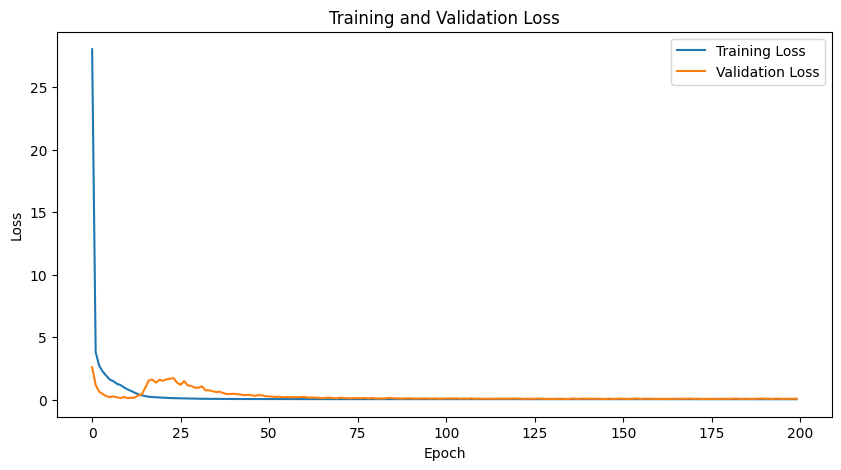

<ipython-input-8-0235d878dcc0>:134: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Test Loss: 0.0468
Mean Absolute Percentage Error: 15.95%
Predicted Price: $293661.13
Actual Price: $346950.00

Dataset sizes:
Training set: 15129 samples
Validation set: 4344 samples
Test set: 2140 samples


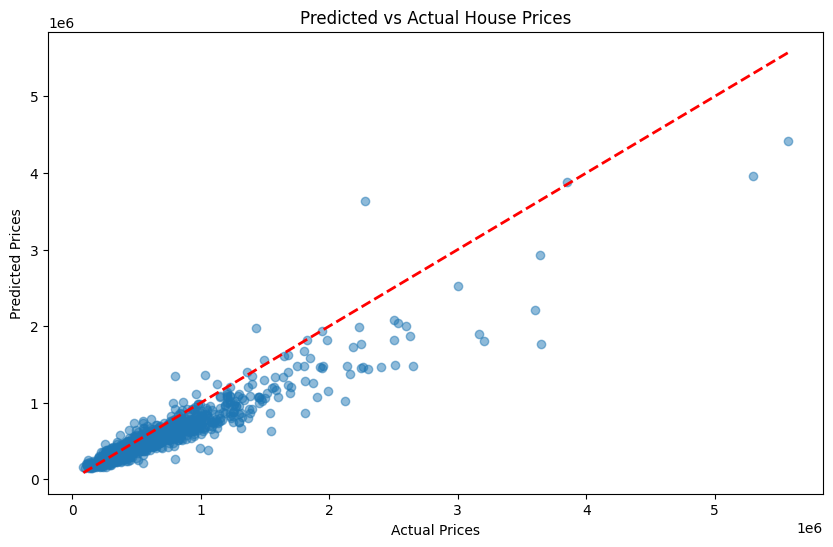

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Check if CUDA is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/kc_house_data.csv')

# Preprocess the data
X = data.drop(['price', 'id', 'date'], axis=1)
y = data['price']

# Log transform the target variable
y = np.log1p(y)

# Split the data into train+val and test sets (80-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# Step 2: Split the remaining 30% into 20% validation and 10% test
# Since X_temp is 30% of the data, we split 2/3 for validation and 1/3 for test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create a custom dataset class
class HouseDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32, device=device)
        self.y = torch.tensor(y.values, dtype=torch.float32, device=device).reshape(-1, 1)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create dataset instances
train_dataset = HouseDataset(X_train_scaled, y_train)
val_dataset = HouseDataset(X_val_scaled, y_val)
test_dataset = HouseDataset(X_test_scaled, y_test)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.layers(x)

# Initialize the model and move it to GPU
input_size = X_train.shape[1]
model = MLP(input_size).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Training loop
num_epochs = 200
best_val_loss = float('inf')
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    epoch_loss /= len(train_loader)
    train_losses.append(epoch_loss)

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            val_loss += criterion(outputs, batch_y).item()
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}')

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))

# Evaluation on test set
model.eval()
test_loss = 0
predictions = []
actuals = []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        test_loss += criterion(outputs, batch_y).item()
        predictions.extend(outputs.cpu().numpy())
        actuals.extend(batch_y.cpu().numpy())
test_loss /= len(test_loader)
print(f'Test Loss: {test_loss:.4f}')

# Convert predictions and actuals back to original scale
predictions = np.expm1(predictions)
actuals = np.expm1(actuals)

# Calculate MAPE
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

# Make predictions
sample_house = torch.tensor(X_test_scaled[0], dtype=torch.float32, device=device).unsqueeze(0)
predicted_price = np.expm1(model(sample_house).item())
actual_price = np.expm1(y_test.iloc[0])
print(f'Predicted Price: ${predicted_price:.2f}')
print(f'Actual Price: ${actual_price:.2f}')

# Print dataset sizes
print(f"\nDataset sizes:")
print(f"Training set: {len(train_dataset)} samples")
print(f"Validation set: {len(val_dataset)} samples")
print(f"Test set: {len(test_dataset)} samples")

# Scatter plot of predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(actuals, predictions, alpha=0.5)
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual House Prices')
plt.show()

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split train+val into train and validation sets (87.5-12.5 split, which is 70-10 of the original data)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create a custom dataset class
class HouseDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32, device=device)
        self.y = torch.tensor(y.values, dtype=torch.float32, device=device).reshape(-1, 1)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create dataset instances
train_dataset = HouseDataset(X_train_scaled, y_train)
val_dataset = HouseDataset(X_val_scaled, y_val)
test_dataset = HouseDataset(X_test_scaled, y_test)


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/kc_house_data.csv')
data=data.drop(['id', 'date'], axis=1)
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = torch.tensor(data,dtype=torch.float32, device=device)

In [ ]:
torch.corrcoef(data.T)

tensor([[ 1.0000e+00,  3.0835e-01,  5.2514e-01,  7.0204e-01,  8.9661e-02,
          2.5679e-01,  2.6637e-01,  3.9729e-01,  3.6362e-02,  6.6743e-01,
          6.0557e-01,  3.2382e-01,  5.4012e-02,  1.2643e-01, -5.3203e-02,
          3.0700e-01,  2.1626e-02,  5.8538e-01,  8.2447e-02],
        [ 3.0835e-01,  1.0000e+00,  5.1588e-01,  5.7667e-01,  3.1703e-02,
          1.7543e-01, -6.5825e-03,  7.9532e-02,  2.8472e-02,  3.5697e-01,
          4.7760e-01,  3.0309e-01,  1.5418e-01,  1.8841e-02, -1.5267e-01,
         -8.9310e-03,  1.2947e-01,  3.9164e-01,  2.9244e-02],
        [ 5.2514e-01,  5.1588e-01,  1.0000e+00,  7.5467e-01,  8.7740e-02,
          5.0065e-01,  6.3744e-02,  1.8774e-01, -1.2498e-01,  6.6498e-01,
          6.8534e-01,  2.8377e-01,  5.0602e-01,  5.0739e-02, -2.0387e-01,
          2.4573e-02,  2.2304e-01,  5.6863e-01,  8.7175e-02],
        [ 7.0204e-01,  5.7667e-01,  7.5467e-01,  1.0000e+00,  1.7283e-01,
          3.5395e-01,  1.0382e-01,  2.8461e-01, -5.8753e-02,  7.6270e-01,


In [ ]:
corr_matrix = torch.corrcoef(data.T)

# Get the absolute values to consider both positive and negative correlations
abs_corr_matrix = torch.abs(corr_matrix)

# Exclude diagonal part (correlation with itself)
abs_corr_matrix = abs_corr_matrix.fill_diagonal_(0)

# Flatten the matrix and get the indices of top 10 values
top_10_indices = torch.topk(abs_corr_matrix.flatten(), 10).indices

# Convert the indices to row and column indices
row_indices = top_10_indices // abs_corr_matrix.shape[0]
col_indices = top_10_indices % abs_corr_matrix.shape[0]

# Print the top 10 feature pairs
for i in range(10):
  print(f"Feature pair: ({row_indices[i]}, {col_indices[i]})")

Feature pair: (10, 3)
Feature pair: (3, 10)
Feature pair: (9, 3)
Feature pair: (3, 9)
Feature pair: (3, 17)
Feature pair: (17, 3)
Feature pair: (9, 10)
Feature pair: (10, 9)
Feature pair: (2, 3)
Feature pair: (3, 2)


In [ ]:
corr_matrix = torch.corrcoef(data.T)

# Get the absolute values to consider both positive and negative correlations
abs_corr_matrix = torch.abs(corr_matrix)

# Get the correlation values with the target variable (price)
price_corr = abs_corr_matrix[0]

# Exclude the target variable itself
price_corr[0] = 0

# Get the indices of the top 10 features
top_10_indices = torch.topk(price_corr, 10).indices

# Print the top 10 features
print(top_10_indices)

tensor([ 3,  9, 10, 17,  2,  7, 11,  1, 15,  6], device='cuda:0')


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/kc_house_data.csv')
data = data.drop(['id','date','sqft_living','sqft_lot','view','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15'], axis=1)

Epoch [10/200], Train Loss: 0.9967, Val Loss: 0.1344
Epoch [20/200], Train Loss: 0.3356, Val Loss: 0.1254
Epoch [30/200], Train Loss: 0.1238, Val Loss: 0.1066
Epoch [40/200], Train Loss: 0.1101, Val Loss: 0.1023
Epoch [50/200], Train Loss: 0.1055, Val Loss: 0.1000
Epoch [60/200], Train Loss: 0.1019, Val Loss: 0.0966
Epoch [70/200], Train Loss: 0.0995, Val Loss: 0.0997
Epoch [80/200], Train Loss: 0.0973, Val Loss: 0.0945
Epoch [90/200], Train Loss: 0.0967, Val Loss: 0.0958
Epoch [100/200], Train Loss: 0.0955, Val Loss: 0.0933
Epoch [110/200], Train Loss: 0.0952, Val Loss: 0.0944
Epoch [120/200], Train Loss: 0.0945, Val Loss: 0.0948
Epoch [130/200], Train Loss: 0.0921, Val Loss: 0.0921
Epoch [140/200], Train Loss: 0.0918, Val Loss: 0.0938
Epoch [150/200], Train Loss: 0.0912, Val Loss: 0.0922
Epoch [160/200], Train Loss: 0.0914, Val Loss: 0.0959
Epoch [170/200], Train Loss: 0.0914, Val Loss: 0.0923
Epoch [180/200], Train Loss: 0.0898, Val Loss: 0.0901
Epoch [190/200], Train Loss: 0.0889, 

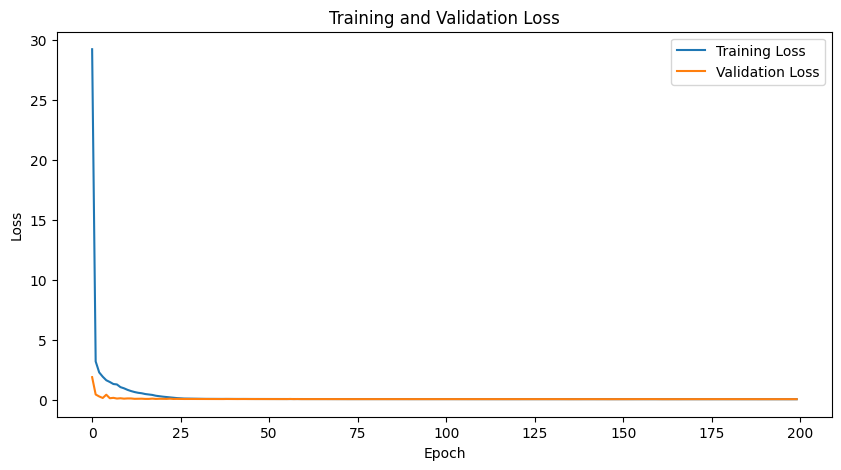

<ipython-input-33-f1c64da10dc7>:116: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Test Loss: 0.0900
Mean Absolute Percentage Error: 23.50%
Predicted Price: $476546.51
Actual Price: $365000.00

Dataset sizes:
Training set: 15128 samples
Validation set: 2162 samples
Test set: 4323 samples


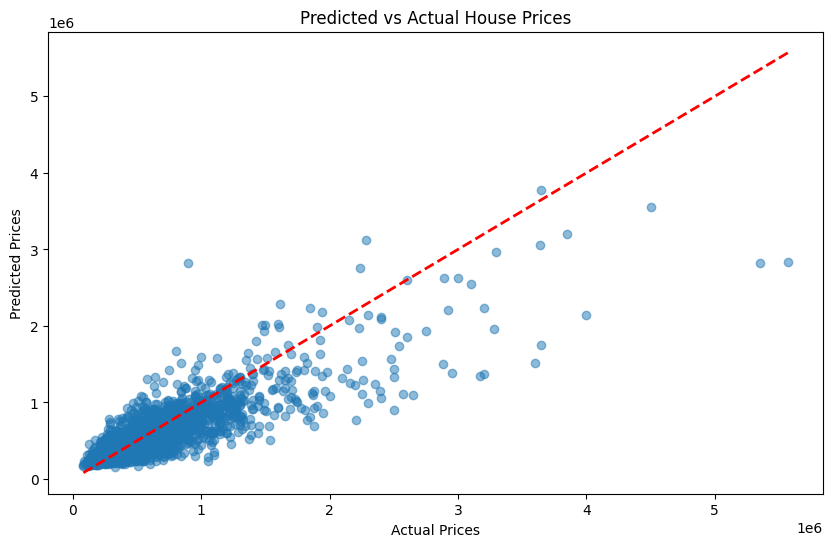

In [ ]:
X = data.drop(['price'], axis=1)
y = data['price']

# Log transform the target variable
y = np.log1p(y)

# Split the data into train+val and test sets (80-20 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split train+val into train and validation sets (87.5-12.5 split, which is 70-10 of the original data)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create a custom dataset class
class HouseDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32, device=device)
        self.y = torch.tensor(y.values, dtype=torch.float32, device=device).reshape(-1, 1)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create dataset instances
train_dataset = HouseDataset(X_train_scaled, y_train)
val_dataset = HouseDataset(X_val_scaled, y_val)
test_dataset = HouseDataset(X_test_scaled, y_test)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.layers(x)

# Initialize the model and move it to GPU
input_size = X_train.shape[1]
model = MLP(input_size).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Training loop
num_epochs = 200
best_val_loss = float('inf')
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    epoch_loss /= len(train_loader)
    train_losses.append(epoch_loss)

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            val_loss += criterion(outputs, batch_y).item()
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}')

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))

# Evaluation on test set
model.eval()
test_loss = 0
predictions = []
actuals = []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        test_loss += criterion(outputs, batch_y).item()
        predictions.extend(outputs.cpu().numpy())
        actuals.extend(batch_y.cpu().numpy())
test_loss /= len(test_loader)
print(f'Test Loss: {test_loss:.4f}')

# Convert predictions and actuals back to original scale
predictions = np.expm1(predictions)
actuals = np.expm1(actuals)

# Calculate MAPE
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

# Make predictions
sample_house = torch.tensor(X_test_scaled[0], dtype=torch.float32, device=device).unsqueeze(0)
predicted_price = np.expm1(model(sample_house).item())
actual_price = np.expm1(y_test.iloc[0])
print(f'Predicted Price: ${predicted_price:.2f}')
print(f'Actual Price: ${actual_price:.2f}')

# Print dataset sizes
print(f"\nDataset sizes:")
print(f"Training set: {len(train_dataset)} samples")
print(f"Validation set: {len(val_dataset)} samples")
print(f"Test set: {len(test_dataset)} samples")

# Scatter plot of predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(actuals, predictions, alpha=0.5)
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual House Prices')
plt.show()